In [ ]:
#Elise Laupland
#June16, 2025
# Apatite provenance, O'Sullivan et al., 2020

In [1]:

!pip install umap-learn
import numpy as np
import umap
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
#import tensorflow as tf

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from itertools import compress
#from importlib.metadata import distribution,metadata,version
#from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
#%matplotlib widget
#%matplotlib ipympl

sns.set_theme(style='white', context='notebook', rc={'figure.figsize':(14,10)})

def export_legend(legend, filepath2, expand=[-5,-5,5,5]):
    
    # filename="legend.png"

    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    
    fig.savefig(filepath2, dpi="figure", bbox_inches=bbox)

In [3]:
#User input
data_folder1 = r"C:\Users\n11554070\OneDrive - Queensland University of Technology\Documents\Zircon Geochemistry DB\UMAP Apatite"
data_folder2 = os.path.join(os.path.dirname(data_folder1), 'figure_outputs\\apatite\\trial1')

file1 = "OSullivan-etal_2019.csv"
file2 = "legend.png" #informative plot

os.chdir(data_folder1)

filepath1 = os.path.join(data_folder1, file1)
filepath2 = os.path.join(data_folder2, file2)
print(f' filepath 2 is {filepath2}')
print(f' filepath 1 is {filepath1}')
table1 = pd.read_csv(filepath1, low_memory=False)
table1.head()

#U = 37
range_imputed = list([0,1,2,3,4,5,6,23,10,8,13,34,35,36,37,38,39,40,41,42,43,44,45,46])
#range_imputed.extend(range(65, 77)) #imputed REE
#range_imputed.extend(list([65, 66, 67, 68, 69, 72, 74, 75, 76, 77]))

table2 = table1.iloc[:, range_imputed] 


table2.head()

 filepath 2 is C:\Users\n11554070\OneDrive - Queensland University of Technology\Documents\Zircon Geochemistry DB\figure_outputs\apatite\trial1\legend.png
 filepath 1 is C:\Users\n11554070\OneDrive - Queensland University of Technology\Documents\Zircon Geochemistry DB\UMAP Apatite\OSullivan-etal_2019.csv


,Analysis,Lithology (Name given by cited author),Lithology (Lithology Code see explanati...),Description (Data Type),Reference,Th [mg/kg],U [mg/kg],Mn [mg/kg],Sr [mg/kg],Ce [mg/kg],...,Imputed_Y,Imputed_Ho,Imputed_Nd,Imputed_Er,Imputed_La,Imputed_Pr,Imputed_Sm,Imputed_Gd,Imputed_Yb,Imputed_Lu
0,GraniteSquirrel1,Mafic I-type granite,IM,Average,Belousova et al. 2001,121.0,27.0,203.0,134.0,3988.0,...,958.0,29.0,1347.0,85.0,2363.0,393.0,194.0,177.0,79.0,13.0
1,GraniteSquirrel2,Mafic I-type granite,IM,Average,Belousova et al. 2001,110.0,37.0,222.0,108.0,3790.0,...,868.0,25.0,1210.0,78.0,1976.0,372.0,166.0,147.0,80.0,15.0
2,GraniteSquirrel3,Mafic I-type granite,IM,Average,Belousova et al. 2001,85.0,36.0,220.0,88.0,4036.0,...,1054.0,32.0,1492.0,90.0,1790.0,446.0,212.0,177.0,95.0,16.0
3,GraniteSquirrel4,Mafic I-type granite,IM,Average,Belousova et al. 2001,46.0,7.0,159.0,50.0,3972.0,...,2649.0,72.0,2335.0,201.0,1389.0,554.0,477.0,480.0,198.0,33.0
4,GraniteSquirrel5,Mafic I-type granite,IM,Average,Belousova et al. 2001,209.0,26.0,340.0,218.0,4938.0,...,829.0,28.0,1615.0,73.0,3329.0,477.0,219.0,195.0,57.0,10.0


In [5]:
#medicine: do not drop string NAs
any_idx = table2.isna().any(axis=1)
table3 = table2.loc[~any_idx, :]

a = table2.shape[0]
b = table3.shape[0]
print(f"Table 2 has {a} rows and Table 3 without NA has {b} rows")

data_start_idx = 5
col_names = list(table3.columns)
c = col_names[data_start_idx:]
print(f"UMAP will use: {c}")

table3.head()

Table 2 has 1298 rows and Table 3 without NA has 718 rows
UMAP will use: ['Th [mg/kg]', 'U [mg/kg]', 'Mn [mg/kg]', 'Sr [mg/kg]', 'Ce [mg/kg]', 'Eu [mg/kg]', 'Imputed_Tb', 'Imputed_Dy', 'Imputed_Tm', 'Imputed_Y', 'Imputed_Ho', 'Imputed_Nd', 'Imputed_Er', 'Imputed_La', 'Imputed_Pr', 'Imputed_Sm', 'Imputed_Gd', 'Imputed_Yb', 'Imputed_Lu']


,Analysis,Lithology (Name given by cited author),Lithology (Lithology Code see explanati...),Description (Data Type),Reference,Th [mg/kg],U [mg/kg],Mn [mg/kg],Sr [mg/kg],Ce [mg/kg],...,Imputed_Y,Imputed_Ho,Imputed_Nd,Imputed_Er,Imputed_La,Imputed_Pr,Imputed_Sm,Imputed_Gd,Imputed_Yb,Imputed_Lu
4,GraniteSquirrel5,Mafic I-type granite,IM,Average,Belousova et al. 2001,209.0,26.0,340.0,218.0,4938.0,...,829.0,28.0,1615.0,73.0,3329.0,477.0,219.0,195.0,57.0,10.0
8,GraniteWimburu4,Mafic I-type granite,IM,Average,Belousova et al. 2001,63.0,17.0,320.0,342.0,1857.0,...,267.0,8.0,447.0,21.0,1478.0,154.0,56.0,52.0,19.0,2.0
9,GraniteMtAngelay1,Mafic I-type granite,IM,Average,Belousova et al. 2001,64.0,14.0,81.0,218.0,3641.0,...,896.0,31.0,1589.0,83.0,1628.0,431.0,241.0,207.0,66.0,11.0
10,GraniteMtAngelay2,Mafic I-type granite,IM,Average,Belousova et al. 2001,26.0,35.0,101.0,229.0,2703.0,...,516.0,19.0,728.0,53.0,1814.0,235.0,93.0,102.0,37.0,6.0
58,BM901,Lherzolite,UM,Average,O'Reilly & Griffin 2000,181.0,47.0,500.0,5831.0,1438.0,...,160.0,6.1,668.0,12.8,995.0,168.0,88.0,66.0,7.6,1.3


In [7]:
categoricals = ["Analysis", "Lithology (Name given by cited author)","Lithology (Lithology Code see explanati...)", "Description (Data Type)", "Reference" ]
for i in range(len(categoricals)):
    temp = table3.loc[:, [categoricals[i]]].value_counts()
    print(temp)

#table3.loc[:, [categoricals[1]]].value_counts()

Analysis  
JLA481-6a     2
ID3A1c        2
KH155c        2
ID3A1a        2
ID3A4g        2
             ..
DC8/11/1a5    1
DC8/11/1a6    1
DC8/11/1a7    1
DC8/11/1a8    1
TCH0079       1
Name: count, Length: 711, dtype: int64
Lithology (Name given by cited author)                 
Alkali-feldspar syenite                                    57
Upper Amphibolite Paragneiss (leucosome?)                  54
Diorite                                                    53
Amphibolite facies pelite                                  50
Paragneiss Upper Amphibolite                               50
Amphibolite facies metabasite                              48
Upper Amphibolite Paragneiss (leucosome present)           34
Granodiorite                                               29
Greenschist facies pelite                                  26
carbonatite                                                26
Upper Greenschist facies pelite                            24
Amphibolite facies Orthogneiss      

In [17]:
components_output = 2 #2, dimensionality
neighbors_input =5  #15, preservation of local (> singletons) vs global structure
min_dist_input = 0.7 #0.003, min. dist. of packing value (in low dimension representation)

#umap object/reducer
embedding = umap.UMAP(n_neighbors= neighbors_input,
                      min_dist= min_dist_input,
                      metric='euclidean', 
                      n_components= components_output) 

data = table3.iloc[:, data_start_idx:].values
scaled_data = StandardScaler().fit_transform(data)
embedding = embedding.fit_transform(scaled_data)

In [25]:
#export values from UMAP squashing
emb = pd.DataFrame(embedding)
t3 = pd.DataFrame(table3)
t1 = pd.DataFrame(table1)

import joblib
emb.to_csv("UMAPapatiteT3emb.csv")
t3.to_csv("UMAPapatitet3_dat.csv")
joblib.dump(embedding, "umap_modelapv3.sav")

['umap_modelapv3.sav']

 filepath 2 is C:\Users\n11554070\OneDrive - Queensland University of Technology\Documents\Zircon Geochemistry DB\figure_outputs\apatite\trial1\legend.png


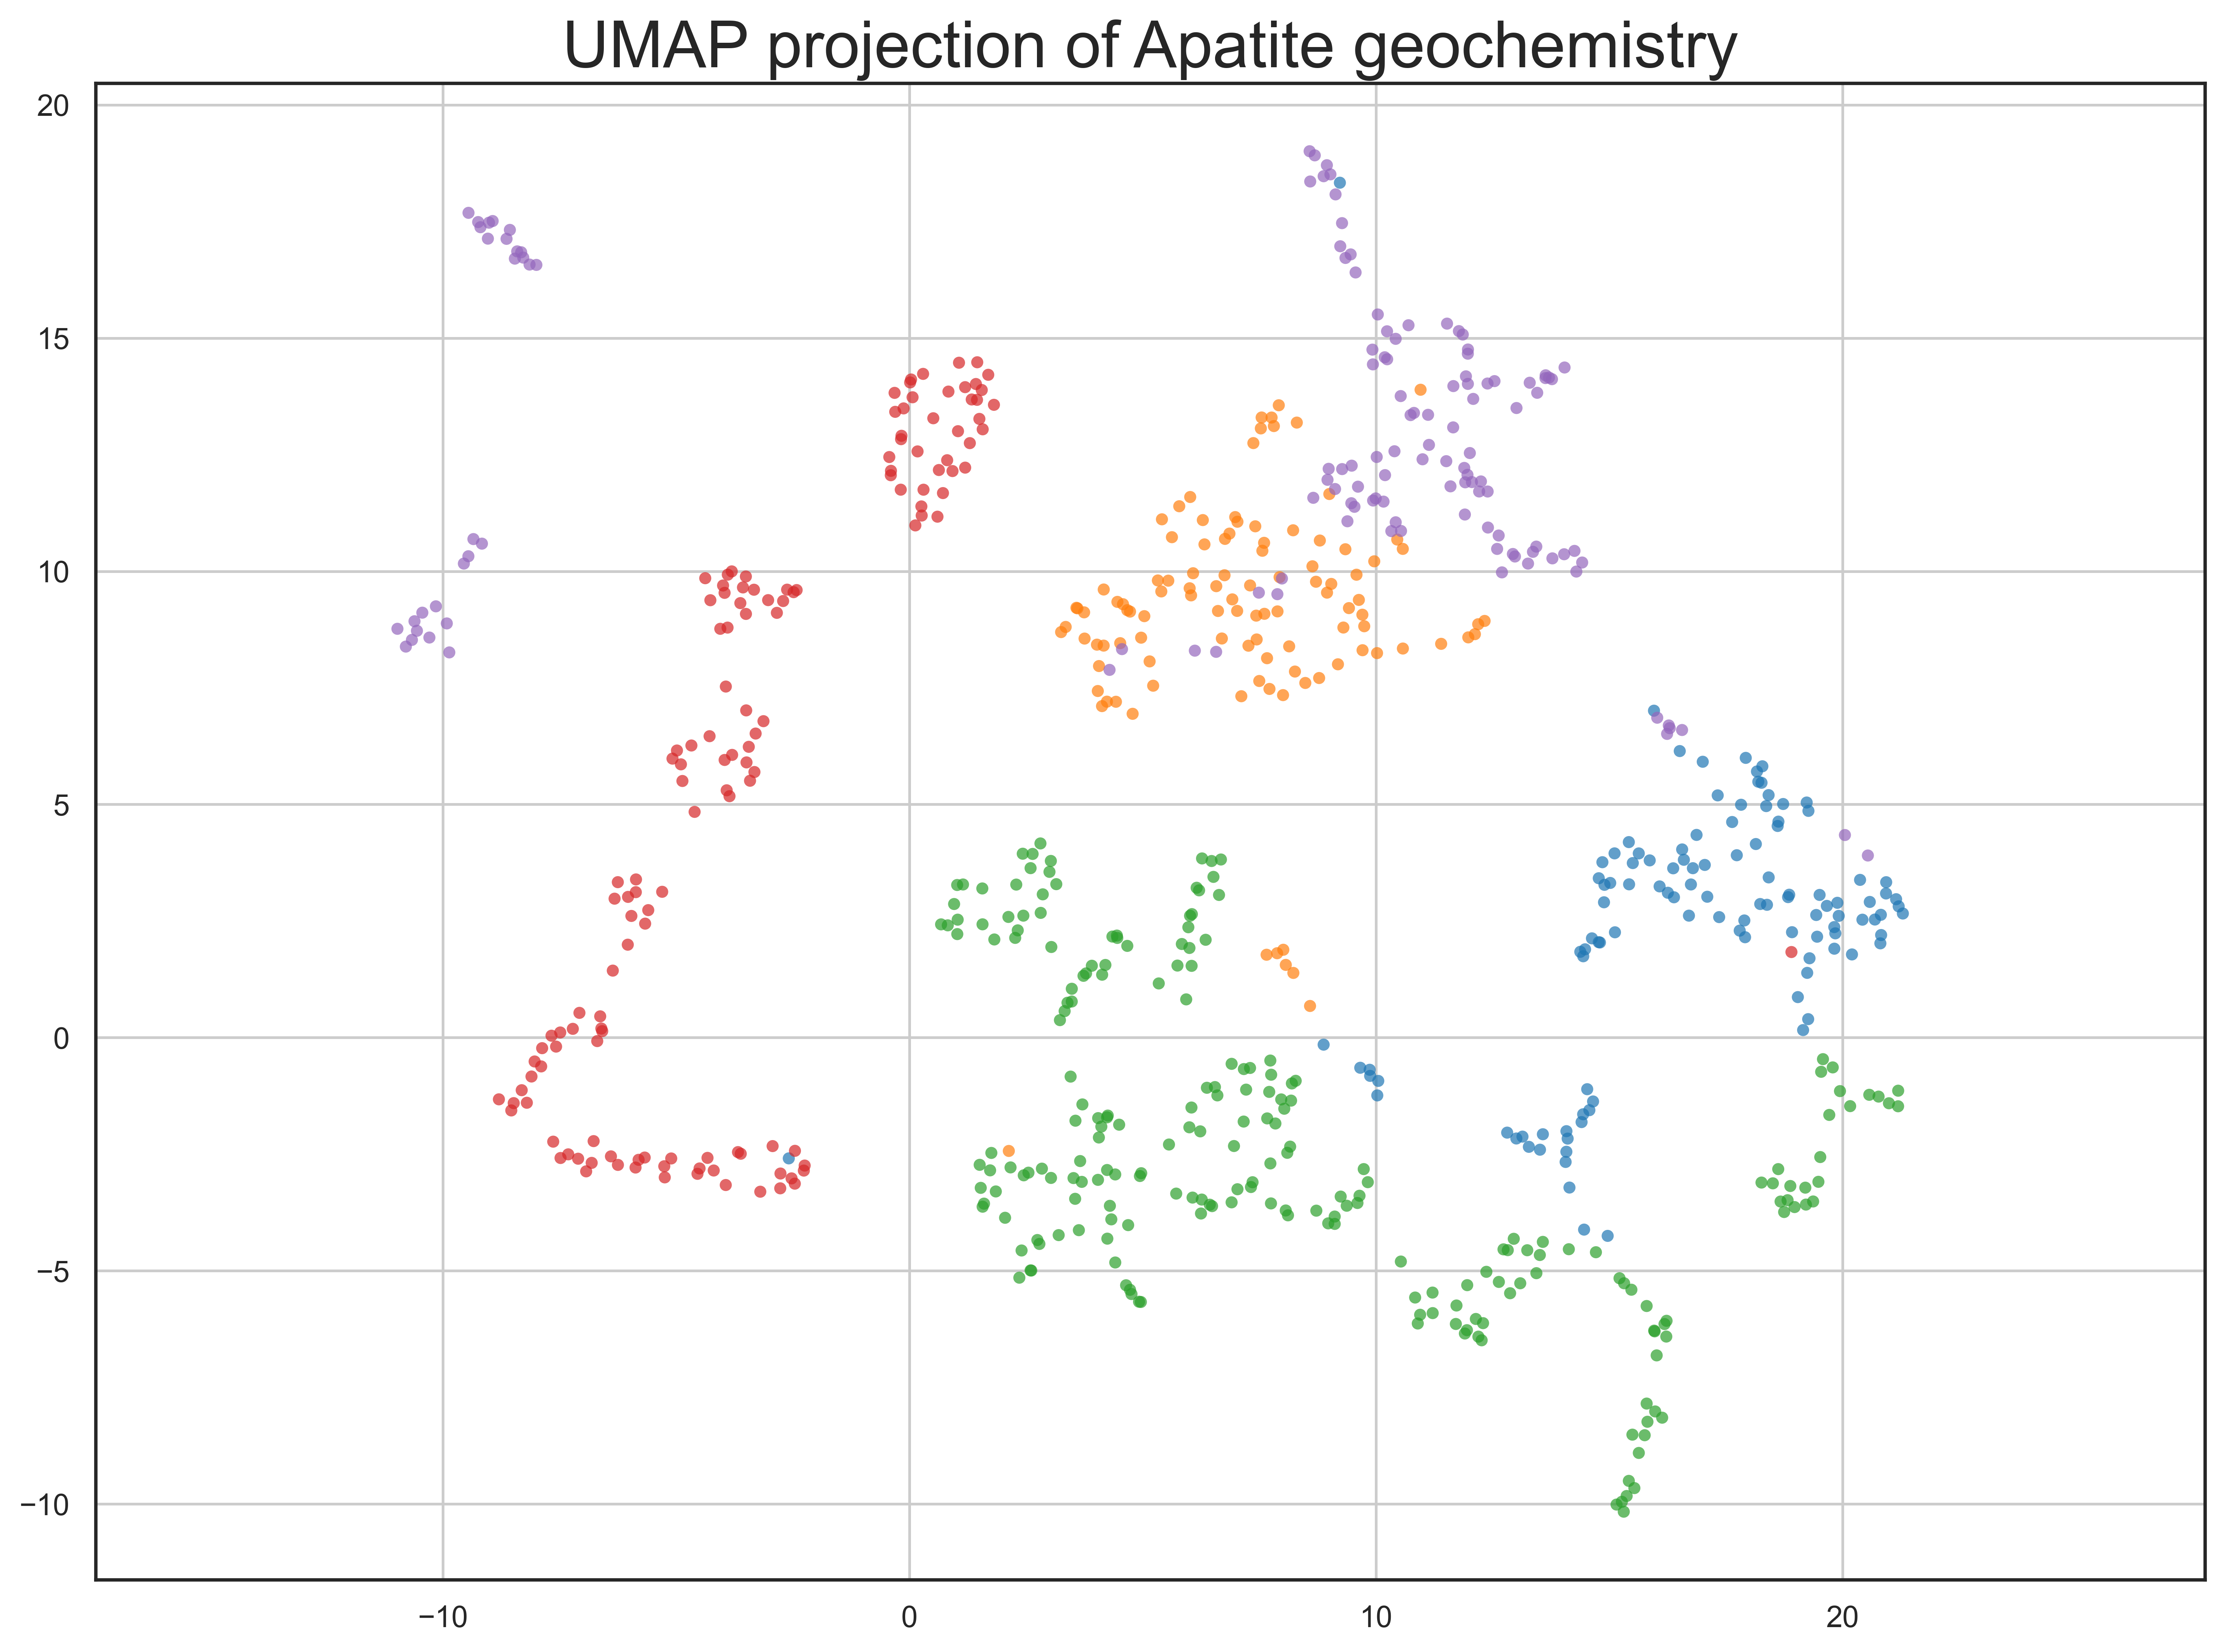

In [19]:
variable_legend = "Lithology (Lithology Code see explanati...)" #Temporality
#variable_legend1 = "Deposit-Batholith" #medicine
variable_legend1 = variable_legend #medicine


print(f' filepath 2 is {filepath2}')
filepath3 = filepath2.replace("legend.png", variable_legend1 + "_legend.png")
filepath4 = filepath2.replace("legend.png", variable_legend1 + "_plot.png")
list_unique = table3[variable_legend].unique()
n_classes = len(list_unique)

mapping = {item:i for i, item in enumerate(list_unique)}
classif= table3[variable_legend].apply(lambda x: mapping[x])
colours = [sns.color_palette(palette= cc.glasbey_category10, n_colors = n_classes)[x] for x in classif]

#Plot
markerSize = 20
fontSize = 18

fig = plt.figure(dpi=500) #1200
#ax = fig.add_subplot(projection='3d')

for x in range(0, n_classes):
    idx = (classif == x)
    name = list_unique[x]
    colours_sub = list(compress(colours, idx))

    if name == 'Ore syn-mineral magmatism':
        colours_sub = 'red'

    if name == 'Syn Mineral':
        colours_sub = 'red'

    if name == 'Ore related magmatism':
        # colours_sub = 'yellow'
        target_colour = (255, 208, 0)
        colours_sub = tuple(ti/255 for ti in target_colour)

    if name == 'Unknown':
        colours_sub = 'lightgrey'

    if name == 'S Type Granite':
        colours_sub = 'violet'
        
    
    if components_output == 2:
        scatter = plt.scatter(embedding[idx, 0], embedding[idx, 1],
                            c=colours_sub, label = name,
                            s= markerSize, alpha= .7, edgecolors= 'none')
    elif components_output == 3:
        scatter = plt.scatter(embedding[idx, 0], embedding[idx, 1], embedding[idx, 2],
                              c=colours_sub, label = name,
                              alpha= .5, edgecolors= 'none')

plt.grid(True)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of Apatite geochemistry', fontsize=24)

lgnd = plt.legend(ncol=1, fontsize= fontSize, loc='center right', bbox_to_anchor=(1.4, 0.5),
                  markerscale= 10, scatterpoints=1)
export_legend(lgnd, filepath2= filepath3)
lgnd.remove()
plt.show()
fig.savefig(filepath4, dpi="figure")
            

In [ ]:
print(filepath3)